# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [338]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [339]:
# Checking the number of mice.
#Fot Dataframes, the "nunique" funciton counts all the non "N/A" resutls.
mice_total = combined_df["Mouse ID"].nunique()
mice_total

249

In [340]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_find = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice_find

array(['g989'], dtype=object)

In [341]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_optional_df = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
duplicate_mice_optional_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [342]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Perfoemed using isin function --> he isin() method checks if the Dataframe contains the specified value(s). It returns a DataFrame similar to the original DataFrame, but the original values have been replaced with True if the value was one of the specified values, otherwise False .
clean_data_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mice_find)==False]
clean_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [343]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_data_df["Mouse ID"].nunique()
number_mice_clean

248

The Unique number of mice seems to be 248

## Summary Statistics

In [344]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).mean()
median = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).median()
variance = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).var()
std = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).std()
sem = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).sem()


 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Val":mean,
                                   "Median Tumor Val":median,
                                   "Tomor Vol Variance":variance,
                                   "Tumor Volume STD":std,
                                   "Tumor Vol Error Val":sem})


summary_statistics

,Mean Tumor Val,Median Tumor Val,Tomor Vol Variance,Tumor Volume STD,Tumor Vol Error Val
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [345]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregate =  clean_data_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem']).style.set_caption("Tumor Volume (mm3)")
summary_aggregate

## Bar and Pie Charts

Text(0.5, 1.0, 'Count of Mice per Treatment')

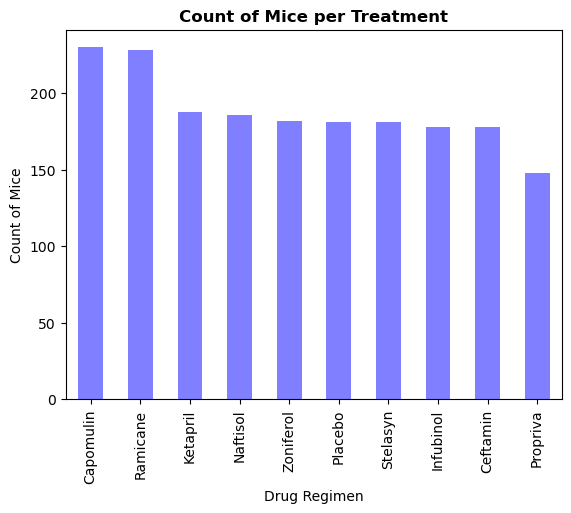

In [346]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_counter = clean_data_df["Drug Regimen"].value_counts()
mice_bar_chart = mice_counter.plot.bar(color= "blue", alpha= 0.5, align= "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.title("Count of Mice per Treatment", fontweight="bold")


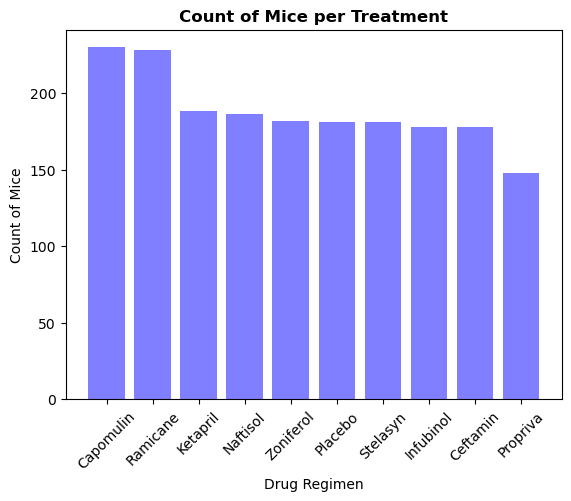

In [347]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_counter.index.values
y_axis = mice_counter.values

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.title("Count of Mice per Treatment", fontweight="bold")
plt.xticks(rotation="45")
plt.show()


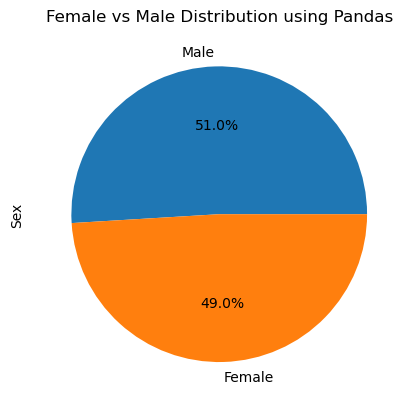

In [348]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs Male Distribution using Pandas")
plt.show()



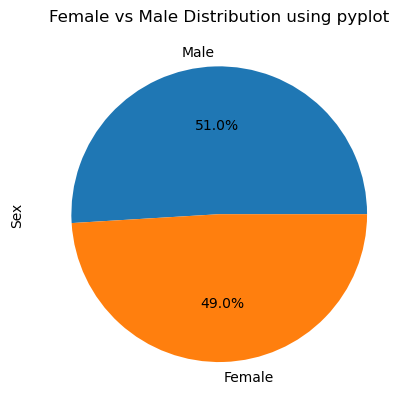

In [349]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Female vs Male Distribution using pyplot')
plt.ylabel('Sex')
plt.show()



## Quartiles, Outliers and Boxplots

Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. Use the following substeps:

Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.

Create a list that holds the treatment names as well as a second, empty list to hold the tumour volume data.

Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumour volumes for each drug to the empty list.

Determine outliers by using the upper and lower bounds, and then print the results.

Using Matplotlib, generate a box plot that shows the distribution of the final tumour volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

Hint: All four box plots should be within the same figure. Use this Matplotlib documentation pageLinks to an external site. for help with changing the style of the outliers.

In [350]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin
#Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = clean_data_df.groupby("Mouse ID").max()[["Timepoint"]]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = pd.merge(greatest_timepoints,clean_data_df, on=("Mouse ID","Timepoint"))
greatest_timepoint_df 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [357]:
#Put treatments into a list for for loop (and later for plot labels)
top_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#print(
           # f"----------------------------------------------------------------------------------------------------.\n"
            #f"Statistical Analysis on the follOwing four drugs: Capomulin, Ramicane, Infubinol and Ceftamin.\n")

# Create empty list to fill with tumor vol data (for plotting)
final_volume_by_drug = []
outliers = []
for drug in top_drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    matching_drug_s = greatest_timepoint_df["Drug Regimen"] == drug
    matched_tumor_volumes = greatest_timepoint_df.loc[matching_drug_s, "Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    LOWER_Q = 0.25
    UPPER_Q = 0.75

    quartiles = matched_tumor_volumes.quantile([LOWER_Q, UPPER_Q])
    lower_q = quartiles[LOWER_Q]
    upper_q = quartiles[UPPER_Q]
    
    # add subset 
    final_volume_by_drug.append(matched_tumor_volumes)

    # Determine outliers using upper and lower bounds
    iqr = upper_q- lower_q
    lower_bound = lower_q- (1.5*iqr)
    upper_bound = upper_q+ (1.5*iqr)

    #Trying to get outliers yto print with the loop. 
    #matched_tumor_volume_df = matched_tumor_volumes.to_frame(name = "matched_tumor_volume_df")
    #df = matched_tumor_volume_df.loc[matched_tumor_volume_df["matched_tumor_volume_df"] < lower_bound]
    #outliers.append(matched_tumor_volume_df.loc[matched_tumor_volume_df["matched_tumor_volume_df"] < lower_bound])
    
    #outliers.append(df["matched_tumor_volume_df"]) 
    print(
                f"----------------------------------------------------------------------------------------------------.\n"
                f"Statistical Analysis on Drug: {drug}.\n"
                f"The Lower Quartile value for {drug} is {round(lower_q,2)}.\n"
                f"The Upper Quartile value for {drug} is {round(upper_q,2)}\n"
                f"The Inter Quartile Range for {drug} is {round(iqr,2)}\n"
                f"By analysing {drug}'s IQR, values below {round(lower_bound,2)} and values above {round(upper_bound,2)} may be outliers")
                #f"Outliers for {drug} are: {outliers} ")
                
                 

----------------------------------------------------------------------------------------------------.
Statistical Analysis on Drug: Capomulin.
The Lower Quartile value for Capomulin is 32.38.
The Upper Quartile value for Capomulin is 40.16
The Inter Quartile Range for Capomulin is 7.78
By analysing Capomulin's IQR, values below 20.7 and values above 51.83 may be outliers
----------------------------------------------------------------------------------------------------.
Statistical Analysis on Drug: Ramicane.
The Lower Quartile value for Ramicane is 31.56.
The Upper Quartile value for Ramicane is 40.66
The Inter Quartile Range for Ramicane is 9.1
By analysing Ramicane's IQR, values below 17.91 and values above 54.31 may be outliers
----------------------------------------------------------------------------------------------------.
Statistical Analysis on Drug: Infubinol.
The Lower Quartile value for Infubinol is 54.05.
The Upper Quartile value for Infubinol is 65.53
The Inter Quartil

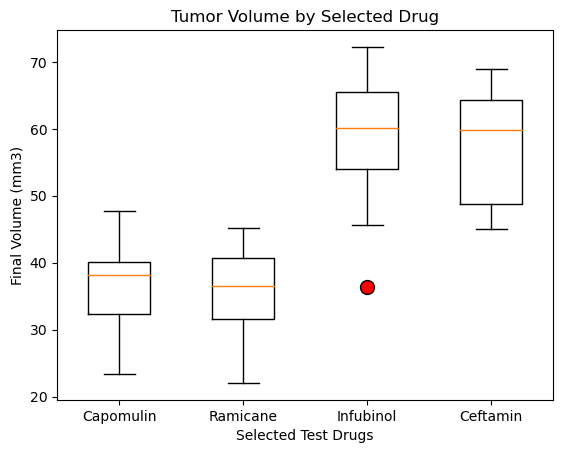

In [352]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Selected Drug")
ax1.set_ylabel("Final Volume (mm3)")
ax1.set_xlabel("Selected Test Drugs")
ax1.boxplot(final_volume_by_drug, labels = top_drugs, widths = 0.5, vert = True, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots
A line plot is generated that shows the tumour volume vs. time point for one mouse treated with Capomulin. (5 points)

A scatter plot is generated that shows average tumour volume vs. mouse weight for the Capomulin regimen. (5 points)

Text(0, 0.5, 'Tumor Volume (mm3)')

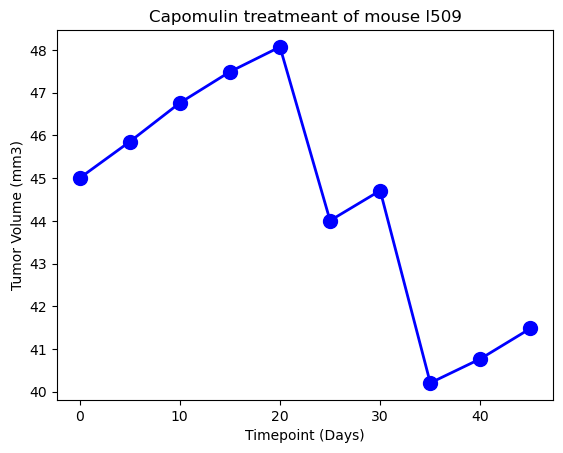

In [353]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#I am utalising mouse 1509 as the basis for the analysys as per inteructions

data_for_1509 = clean_data_df.loc[clean_data_df["Mouse ID"] == "l509",:]
data_for_1509
x_axis = data_for_1509["Timepoint"]
y_axis = data_for_1509["Tumor Volume (mm3)"]

fig_1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis, linewidth=2, markersize=10,marker="o",color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

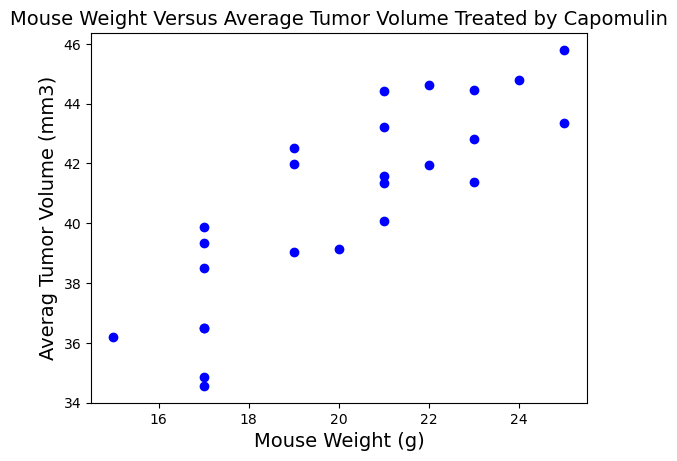

In [354]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
cap_avg_vol =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(cap_avg_vol['Weight (g)'],cap_avg_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume Treated by Capomulin',fontsize =14)
plt.xlabel('Mouse Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


## Correlation and Regression

In [355]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_avg_vol['Weight (g)'],cap_avg_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The correlation between mouse weight and the average tumor volume is: 0.84


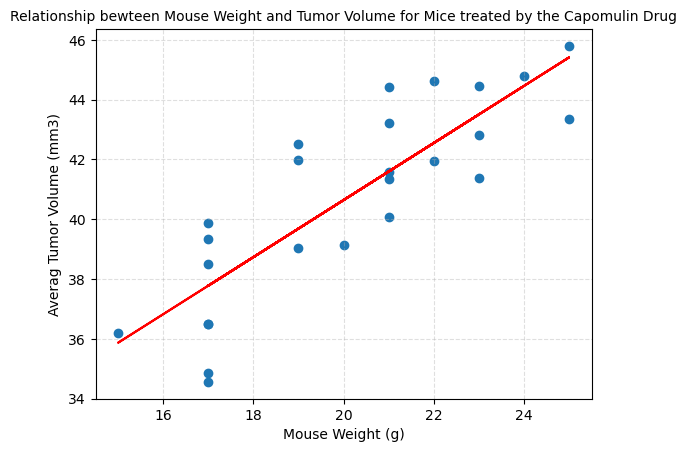

In [356]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_avg_vol['Weight (g)']
y_values = cap_avg_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)
plt.grid(alpha=.4,linestyle='--')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Relationship bewteen Mouse Weight and Tumor Volume for Mice treated by the Capomulin Drug", fontsize = 10)
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}")
plt.show()

Three Conclussions: 
1. Based on the box plots, Infubinol had the greatest final tumor size. 
2. There seems to be a possitive correlation between average tumor volume and moise weight for those treated by Capomulin. 
3. By the final time point, mice I509 had experienced a rapid decline in tumor volume following by a slight increase.  